In [1]:
from PIL import Image  
import numpy as np 
import sdf2circle as sdf
import gaussian_kern as gs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import measure,draw 
from scipy import signal

In [2]:
def NeumannBoundCond(f):#诺依曼边界
    g = f
    g[0,0] = g[2,2]
    g[0,-1] = g[2,-3]
    g[-1, 0] = g[-3, 2]
    g[-1,-1] = g[-3,-3]
    g[0][1:-1] = g[2][1:-1]
    g[-1][1:-1] = g[-3][1:-1]
    
    g[0][1:-1] = g[2][1:-1]
    g[-1][1:-1] = g[-3][1:-1]
    
    g[1:-1,0] = g[1:-1,2]
    g[1:-1,-1] = g[1:-1,-3]
    
    return g


In [6]:
im= Image.open("noisyImg.bmp")#读取图像
#r,g,b=im.split()
gray=im.convert('L')#灰度图
img=np.array(gray)#转为数组

Img=img.astype(np.float)#转为浮点型


[nrow,ncol] = Img.shape
ic = nrow/2
jc = ncol/2
r = 30;
phi = sdf.sdf2circle(nrow,ncol, ic,jc,r)#初始轮廓


sigma=1.5
G = gs.gkern(15,sigma)
Img_smooth = signal.convolve2d(Img, G, 'same')#高斯平滑

[Ix,Iy]=np.gradient(Img_smooth)
f=Ix**2+Iy**2
g=1/(1+f)#边缘停止函数

delt = 0.1
F = 0.5
nu = 1
Iternum = 3000
eps = 2.2204e-16

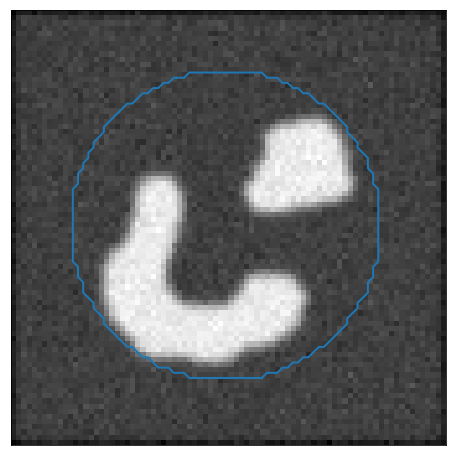

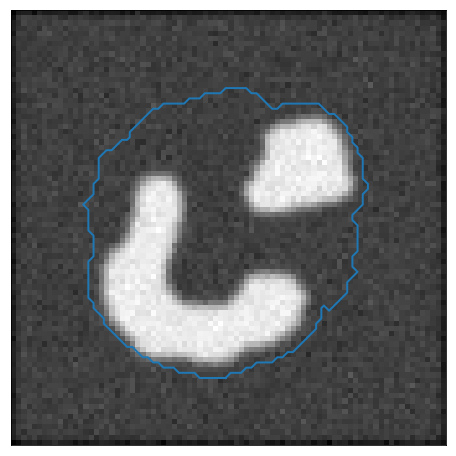

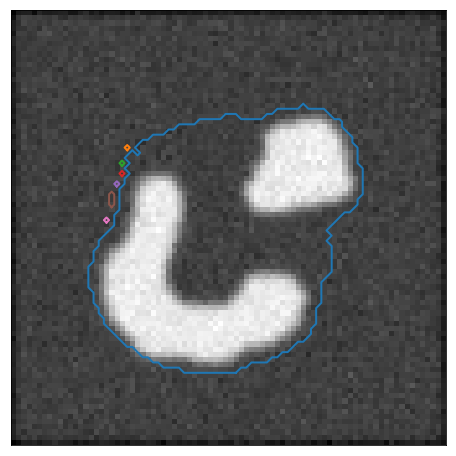

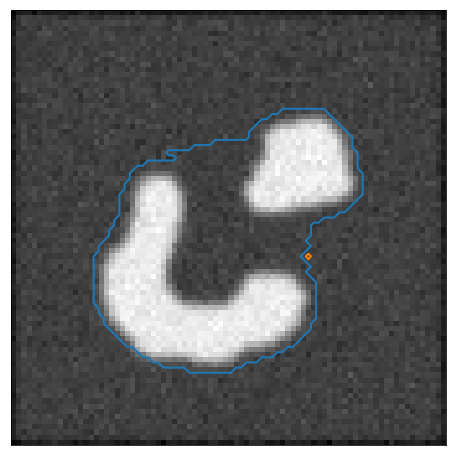

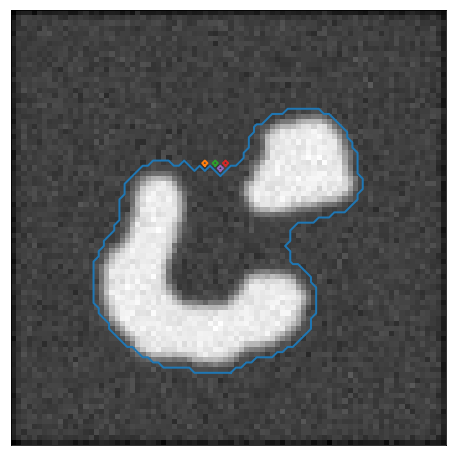

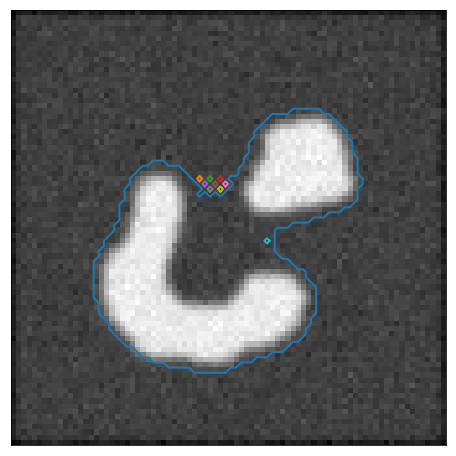

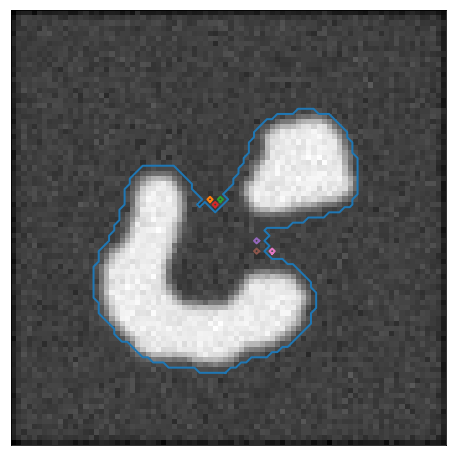

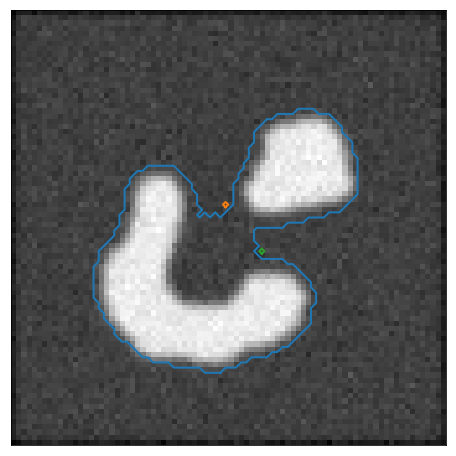

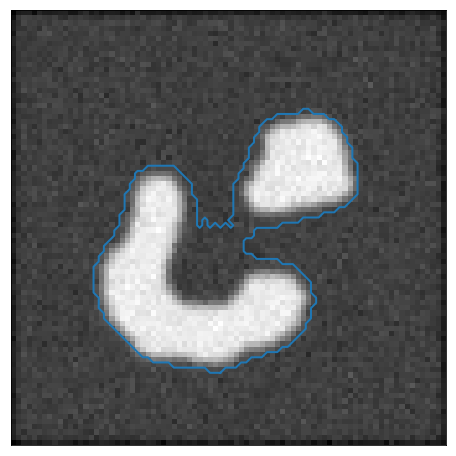

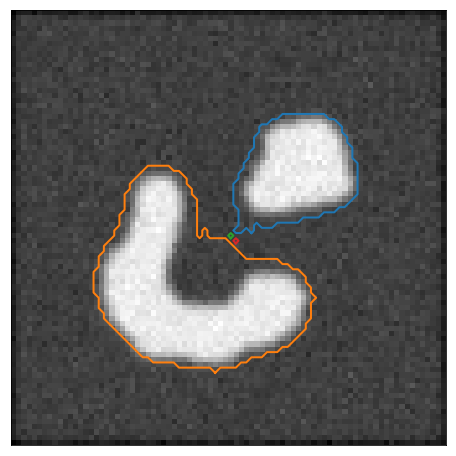

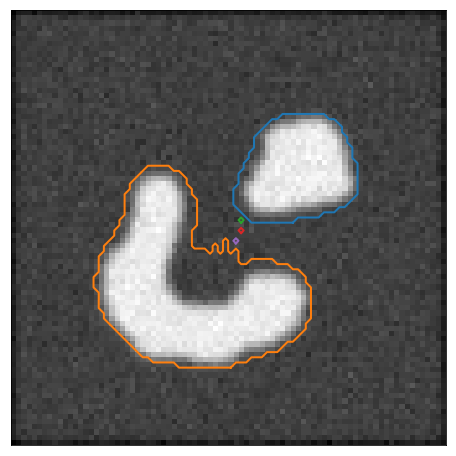

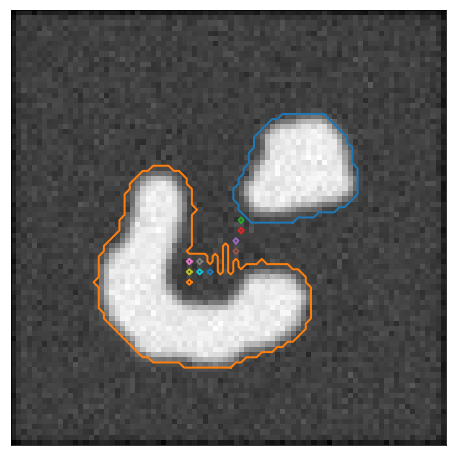

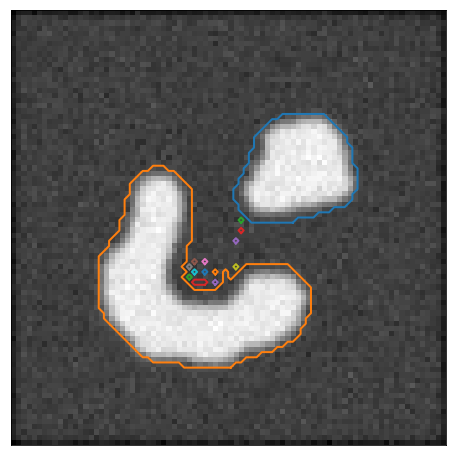

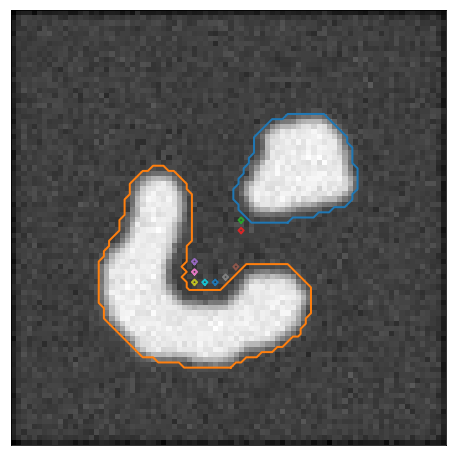

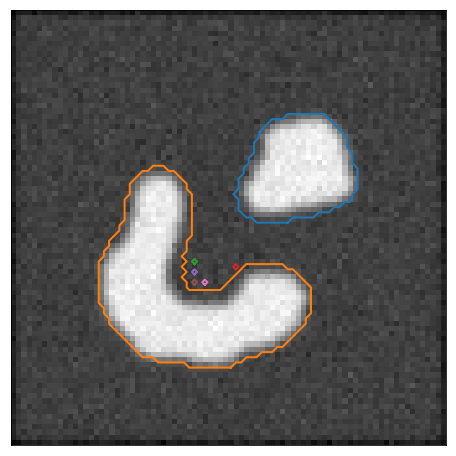

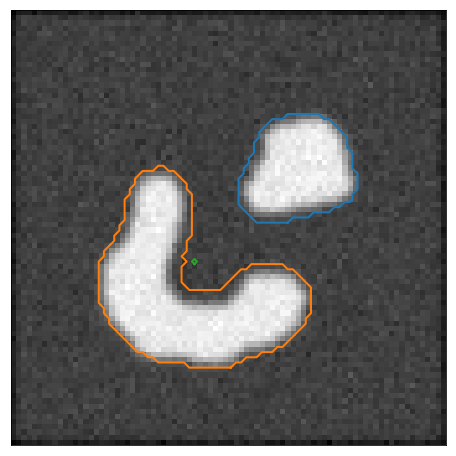

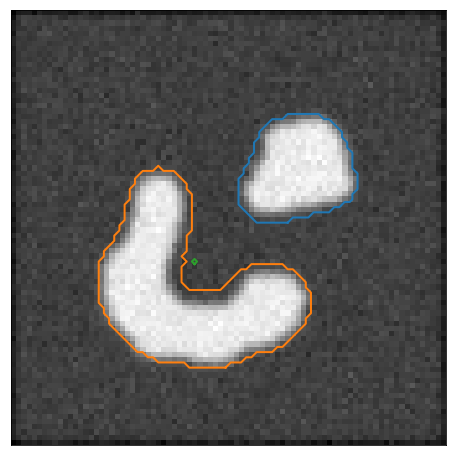

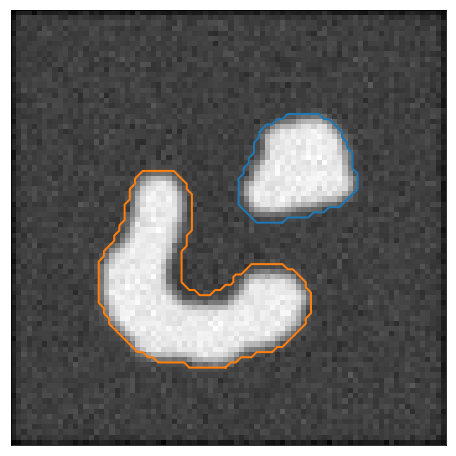

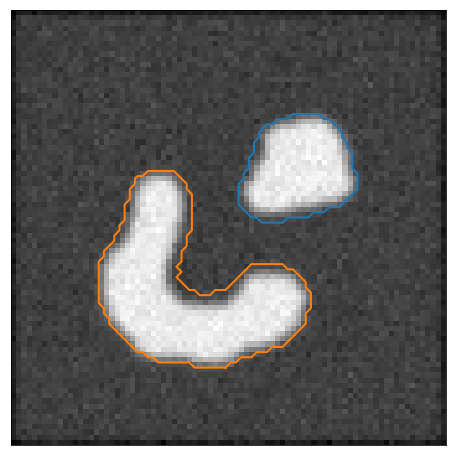

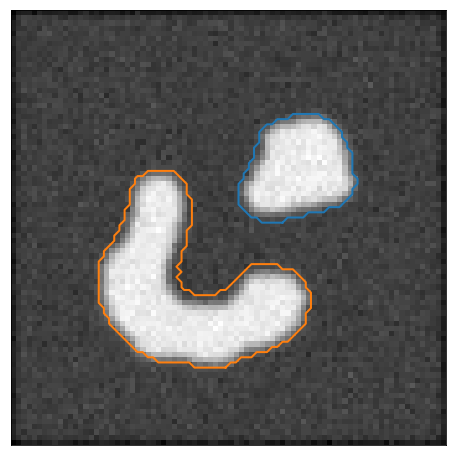

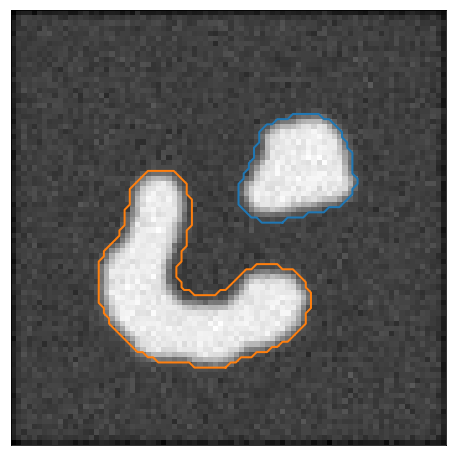

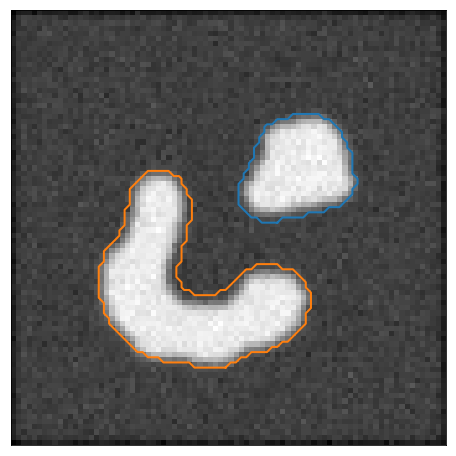

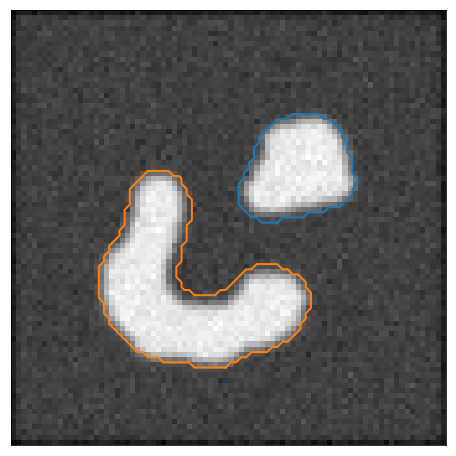

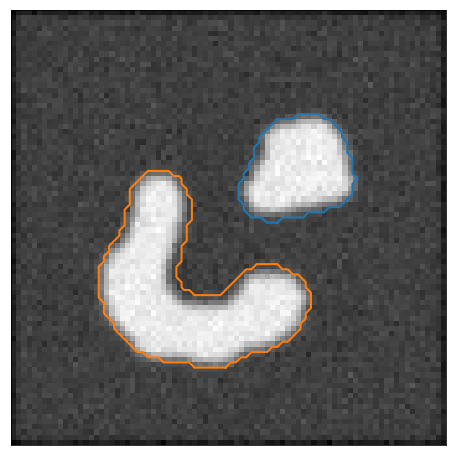

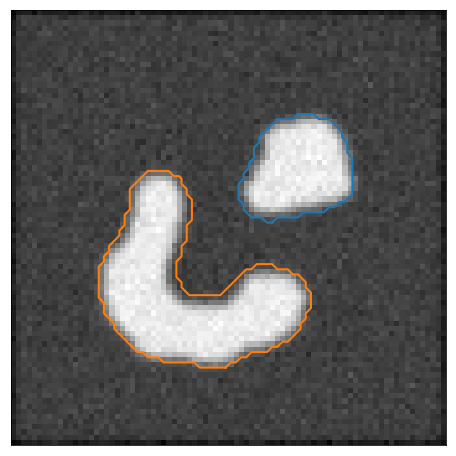

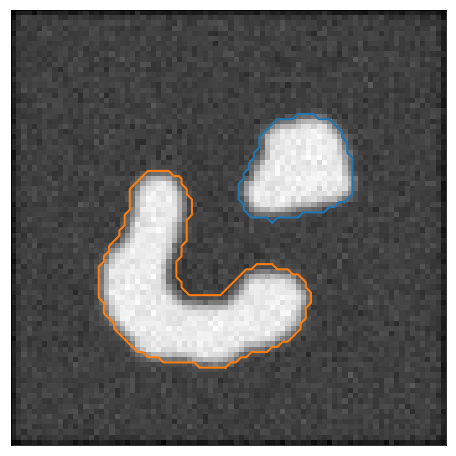

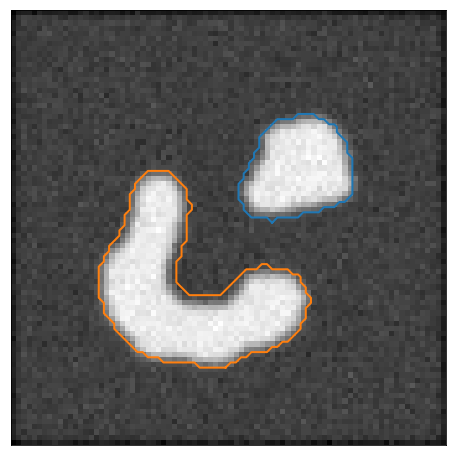

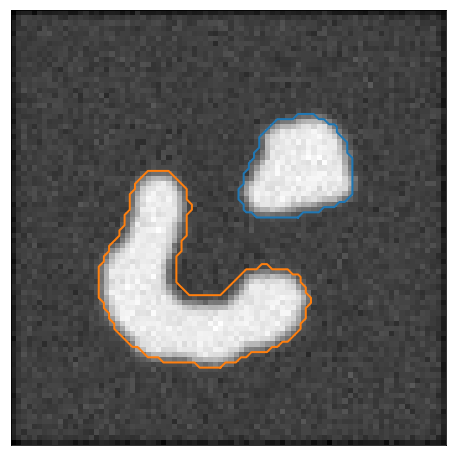

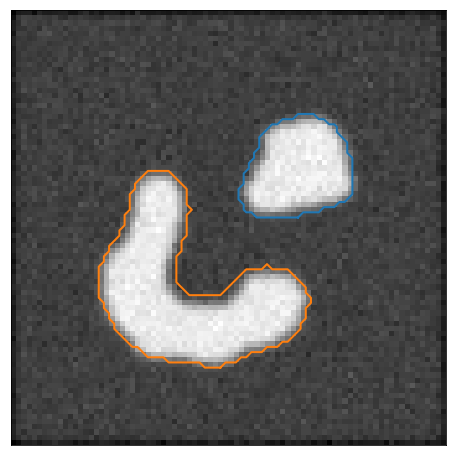

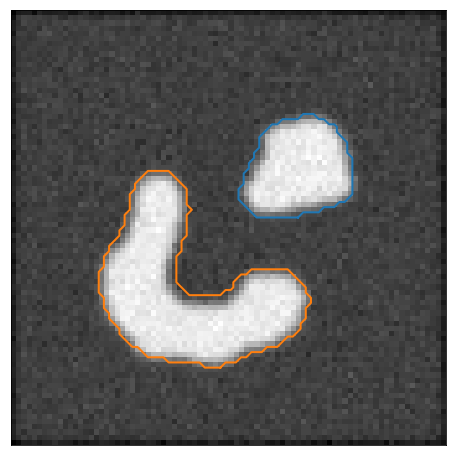

In [7]:
for n in range(Iternum):
    phi = NeumannBoundCond(phi)
    #Kappa_g = curvature_central(phi)
    [nx,ny]=np.gradient(phi)
    absR = np.sqrt(nx**2 + ny**2)
    absR = absR + (absR==0)*eps
    
    [nxx,junk]=np.gradient(g*nx/absR) 
    [junk,nyy]=np.gradient(g*ny/absR)
    Kappa_g = nxx + nyy

    phi = phi + delt*((nu*Kappa_g + g*F)*absR)

    
    if n%100==0:#画图
        i=phi<0
        contours = measure.find_contours(i, 0.5)
        #fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
        fig, ax1 = plt.subplots(1,figsize=(8,8))
        #ax0.imshow(img,plt.cm.gray)
        ax1.imshow(img,plt.cm.gray)
        for n, contour in enumerate(contours):
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
            #ax1.axis('image')
            ax1.set_xticks([])
            ax1.set_yticks([])
        plt.show()


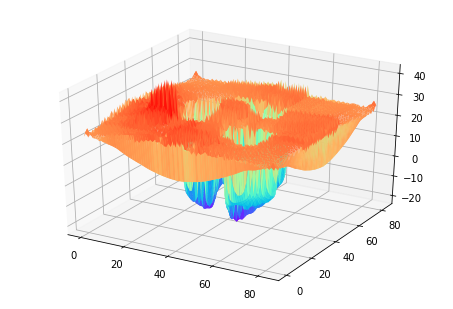

In [8]:
figure = plt.figure()
ax = Axes3D(figure)
#ax.view_init(elev=11., azim=11)
[x,y]=phi.shape
X = np.arange(0, y, 1)
Y = np.arange(0, x, 1)
#网格化数据
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap='rainbow')

plt.show()